# Homework 1 - Coding

In this problem you will  generate plots for the bike sharing demand dataset in this notebook. Please follow the instructions in markdown cells and comments, and add your code after the comment "write your code here." Most plots were already introduced in the first lab. See https://github.com/tsourolampis/cs365-spring23/blob/main/lab/Lab1.ipynb.

## Download the dataset from sklearn

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

bike_sharing = fetch_openml(
    "Bike_Sharing_Demand", version=2, as_frame=True
)

df = bike_sharing.frame


In [2]:
# print the dataframe
print(df)

       season  year  month  hour holiday  weekday workingday weather   temp  \
0      spring   0.0    1.0   0.0   False      6.0      False   clear   9.84   
1      spring   0.0    1.0   1.0   False      6.0      False   clear   9.02   
2      spring   0.0    1.0   2.0   False      6.0      False   clear   9.02   
3      spring   0.0    1.0   3.0   False      6.0      False   clear   9.84   
4      spring   0.0    1.0   4.0   False      6.0      False   clear   9.84   
...       ...   ...    ...   ...     ...      ...        ...     ...    ...   
17374  spring   1.0   12.0  19.0   False      1.0       True   misty  10.66   
17375  spring   1.0   12.0  20.0   False      1.0       True   misty  10.66   
17376  spring   1.0   12.0  21.0   False      1.0       True   clear  10.66   
17377  spring   1.0   12.0  22.0   False      1.0       True   clear  10.66   
17378  spring   1.0   12.0  23.0   False      1.0       True   clear  10.66   

       feel_temp  humidity  windspeed  count  
0   

## Correlation matrix [5pts]

Correlation is a measure that quantifies the degree to which a pair of variables are linearly related. Intuitively, with a positive correlation between A and B, we will likely see B increase as A increases. 

Formally, the correlation is defined as normalized covariance, i.e., $corr(A,B)={cov(A,B)\over \sigma_A \sigma_B}$, where $\sigma_A=\sqrt{Var(A)}$ is the standard deviation of A.

In Python, the correlation between columns of a dataframe can be calculated using dataframe.corr() function. Generate a correlation matrix of four features "temp", "feel_temp", "humidity" and "windspeed". Which two features are most positively correlated?

In [3]:
# write your code here
df_cor = df[["temp","feel_temp", "humidity", "windspeed"]]
df_cor.corr()
# feel_temp and temp are most positively correlated

,temp,feel_temp,humidity,windspeed
temp,1.000000,0.987672,-0.069881,-0.023125
feel_temp,0.987672,1.000000,-0.051918,-0.062336
humidity,-0.069881,-0.051918,1.000000,-0.290105
windspeed,-0.023125,-0.062336,-0.290105,1.000000


## Histogram of temperatures [5pts]

How does temperature change by season? You are asked to generate histograms of temperature values across seasons using different legends. Use histograms with shifts to avoid overlapping.

Use the label parameter in plt.hist to assign labels to different histograms, and use plt.legend() to show the labels in the figure.

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']


Text(0.5, 1.0, 'shift histogram for seasonal temperature')

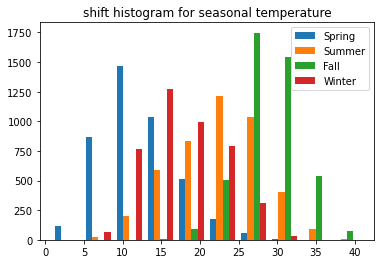

In [4]:
# write your code here
unique_values = df['season'].unique()
print(unique_values)
spring = df[df['season']=='spring']
summer = df[df['season']=='summer']
fall = df[df['season']=='fall']
winter = df[df['season']=='winter']
a = spring['temp'].values
b = summer['temp'].values
c = fall['temp'].values
d = winter['temp'].values
lab = ['Spring','Summer','Fall','Winter']
plt.hist((a,b,c,d), label=lab)
plt.legend()
plt.title('shift histogram for seasonal temperature')

## Scatter plot [5pts]

You are asked to generate a figure with four axes. Each axis should show a scatter plot of humidity v.s. temp within one season. You can use the alpha parameter in plt.scatter to adjust the transparency of points.

Which season is unique concerning humidity and temp, and why?

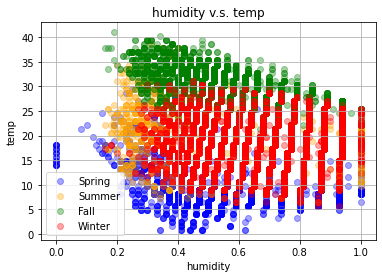

In [5]:
# write your code here
fig, ax = plt.subplots()
ax.scatter(spring['humidity'],spring['temp'], label='Spring', facecolor = 'blue',alpha = 0.35)
ax.scatter(summer['humidity'],summer['temp'], label='Summer', facecolor = 'orange',alpha = 0.35)
ax.scatter(fall['humidity'],fall['temp'], label='Fall', facecolor = 'green',alpha = 0.35)
ax.scatter(winter['humidity'],winter['temp'], label='Winter', facecolor = 'red',alpha = 0.35)
ax.set_xlabel("humidity")
ax.set_ylabel("temp")
ax.grid()
ax.set_title("humidity v.s. temp")
ax.legend()

plt.show()


## Boxplot [5pts]

Pandas.dataframe support the function boxplot(column, by, *other params). Here "column" takes one or a list of column names, and "by" takes another column name. One boxplot will be done per value of columns in "by". 

Please use this function to draw boxplots of the "count" column across different "weather" conditions. In this plot, the x-axis should list four weather conditions, and the y-axis should represent the bike sharing count.

['clear', 'misty', 'rain', 'heavy_rain']
Categories (4, object): ['clear', 'misty', 'rain', 'heavy_rain']


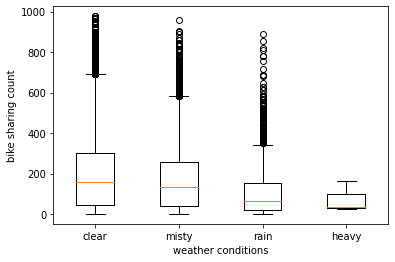

In [6]:
# write your code here
unique_values = df['weather'].unique()
print(unique_values)
clear = df[df['weather'] == 'clear']
misty = df[df['weather'] == 'misty']
rain = df[df['weather'] =='rain']
heavy = df[df['weather'] =='heavy_rain']
data = [clear['count'].values,
        misty['count'].values,
        rain['count'].values,
        heavy['count'].values ]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['clear', 'misty', 'rain', 'heavy'])
plt.ylabel('bike sharing count')
plt.xlabel('weather conditions')
plt.show()



## Time series [5pts]

Now let's have a look at time series data. Group the filtered_df by "weekday" and "hour", then calculate the mean of "count". Plot how the mean of "count" changes in a week using plot() function.

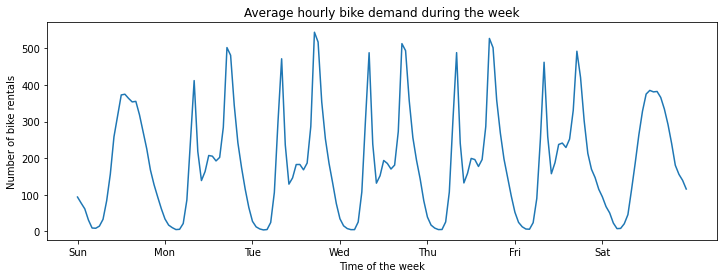

In [11]:
filtered_df = df[['weekday','hour','count']]
fig, ax = plt.subplots(figsize=(12, 4))

# write your code here
group = filtered_df.groupby(['weekday','hour'],as_index=False).mean()
group['idx'] = group.groupby(['weekday','hour'],as_index=False).ngroup()
plt.plot(group['idx'],group['count'])

# Set up ticks and labels. 
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

## Fast Fourier Transform

You should see that the mean of "count" shows a daily pattern from Monday to Friday. 

Fourier Transform is a widely used method to understand sequential data. While this will be covered in future lectures, in this notebook, we want to show how to visualize time series data from the frequency domain using FFT and its inverse in Python. A fast Fourier transform (FFT) is an algorithm that computes the discrete Fourier transform (DFT) of a sequence or its inverse (IDFT). Fourier analysis converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa. 

In [12]:
from numpy.fft import fft, ifft
import numpy as np

### Example

Below is an example of a sequence composed of signals from three different frequencies. We visualize this complicated sequence using the plt.plot function.

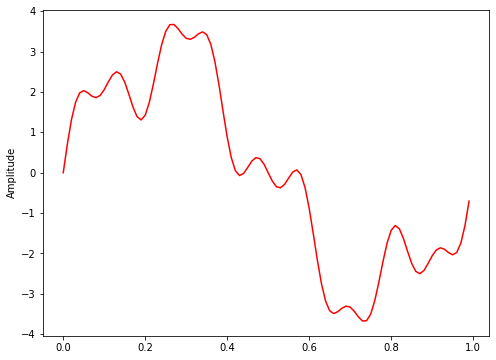

In [13]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 9   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In the next cell, we convert the sequence from the time domain into the frequency domain using the FFT function supported by numpy. The result of FFT is shown in the first subplot. We can observe that FFT recovers all three frequencies we planted. Then we use the IFFT function to convert the signal back to the time domain and plot it in the second subplot. 

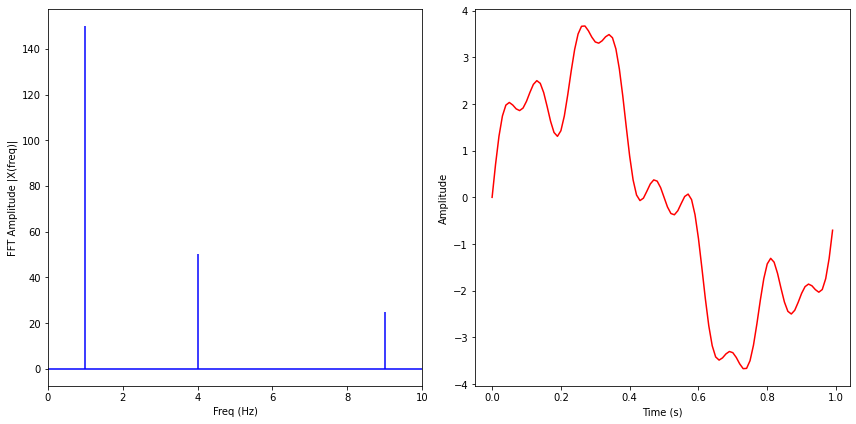

In [14]:
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Question: What do you observe in the above plots?

## FFT on the sequential data [5pts]

Follow the worked out example in the previous cell by applying the FFT function on the mean of the "count" from Monday to Friday. After that, use the IFFT function to convert the signal back to the time domain. Plot both results in one figure.

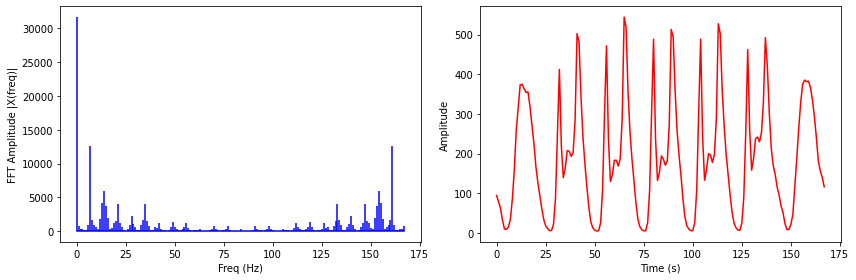

In [18]:

# write your code here
X = fft(group['count'])
sp = len(group['idx'])
t = group['idx']
N = len(X)
n = np.arange(N)
T = N/sp
freq = n/T 

plt.figure(figsize = (12, 4))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()